Integrantes:  
    1.Juan Manuel Jimenez  
    2.Ian Cristobal Chona  
    3.Camilo Franco Beltran  

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import math
from matplotlib import pyplot as plt
from itertools import combinations

Ejercicio 2.1.1  

1.Si la columna es realmente categorica le anteponemos su nombre de columna

In [7]:
baseball = pd.read_csv('baseball.csv').replace('?', 0)
def binarizeCategoricalAttributeVector(column):    
    uniqueAtt=column.unique()
    m=np.empty([column.shape[0],uniqueAtt.shape[0]],dtype=int)    
    for i,uniqueCol in enumerate(uniqueAtt):
        basis=np.zeros(uniqueAtt.shape[0])
        basis[i]=1       
        for j,originalCol in enumerate(column):
            if originalCol==uniqueCol:
                m[j]=basis
    ###1.Asi señalizamos el comentario en el markdown para no poner tantos comentarios sobre el codigo.
    if not(pd.to_numeric(column, errors='coerce').notnull().all()):        
        uniqueAtt=uniqueAtt.astype('object')
        uniqueAtt=column.name+"-"+uniqueAtt
    df = pd.DataFrame(data=m,columns=uniqueAtt)      
    
    return df

#binarizeCategoricalAttributeVector(baseball.iloc[:,0])

Ejercicio 2.1.2  

1.Si la columna no puede ser convertida en su totalidad a valores numericos concluimos que es categorica.  
2.Entonces las convertimos en categoricas para diferenciarla de las demas columnas

In [8]:
def getCategoricalAttributes(df):    
    for column in df:
        
        if not(pd.to_numeric(df[column], errors='coerce').notnull().all()):###1.
            df[column] = df[column].astype('category')###2
                    
    columns=df.select_dtypes(include=['category']).columns        
    return (columns)
#irisset=pd.read_csv("iris.csv")
#getCategoricalAttributes(baseball)

Ejercicio 2.1.3      

1.Siempre es mejor retornar una copia por si se requiere tener la data original.   
2.El parametro inplace nos permite no tener que reasignar df1 de nuevo, sino que  lo cambia sobre el original.  

In [9]:
def readFrameAsMatrix(df):
    df1=pd.DataFrame.copy(df)#1
    categoryCols=getCategoricalAttributes(df)    
    for columnX in categoryCols:
        newFrame=binarizeCategoricalAttributeVector(df[columnX])        
        df1=pd.concat([df1, newFrame], axis=1)
    df1.drop(columns=categoryCols,inplace=True)#2 
    return df1
#irisset=pd.read_csv("iris.csv")
#readFrameAsMatrix(baseball)

In [26]:
## Unit Test for Exercise 2.1
bbdf = pd.read_csv("baseball.csv")
bbdf = bbdf.replace("?", 0)
print ("Binarization of first attribute " + ("ok." if binarizeCategoricalAttributeVector(bbdf.iloc[:,0]).shape == (1232,39) else "failed."))
print ("Binarization of second attribute " + ("ok." if binarizeCategoricalAttributeVector(bbdf.iloc[:,1]).shape == (1232,2) else "failed."))
cat = list(getCategoricalAttributes(bbdf).values)
print("Identification of categorical attributes ok!" if len(cat) == 6 and cat == ['Team', 'League', 'RankSeason', 'RankPlayoffs', 'OOBP', 'OSLG'] or len(cat) == 2 and cat == ['Team', 'League'] else "incorrect categorical attributes " + str(cat))
M = readFrameAsMatrix(bbdf).values
if type(M) == np.ndarray:
    print("Dimensions ok!" if M.shape == (1232, 54) or M.shape == (1232, 251) else "Dimensions of the array not correct")
else:
    print("No np array returned! Returned object " + str(type(M)))

Binarization of first attribute ok.
Binarization of second attribute ok.
Identification of categorical attributes ok!
Dimensions ok!


## Feedback
1. ok
2. ok
3. ok, only that you should return a `numpy.array` instead of a dataframe.

2/2

Ejercicio 2.2.1      

1.Añadimos el minimo y el maximo al arreglo de thresholds.   
2.No podemos iterar sobre todos los thresholds, por que en nuestro for necesitamos acceder al,
  threshold i+1, esta la opcion de usar  el operador mod(%), pero arruina la logica.

In [27]:
def discretizeBasedOnThresholds(arr,colIndex,thresholds):
    thresholds=np.sort(thresholds)
    if not(pd.to_numeric(arr.iloc[:,colIndex], errors='coerce').notnull().all()):
        df=arr
        
    else:
        arr2=pd.DataFrame.copy(arr.iloc[:,colIndex]).astype(object)
        arr.iloc[:,colIndex]=pd.to_numeric(arr.iloc[:,colIndex], errors='coerce')        
        minVal=arr.iloc[:,colIndex].min()        
        maxVal=arr.iloc[:,colIndex].max()
        thresholds=np.append(minVal,thresholds)
        thresholds=np.append(thresholds,maxVal)###1        
        numThresh=thresholds.shape[0]      
        
        for i in range(numThresh-1):###2
            if i==0:
                limInf=arr.iloc[:,colIndex]>=thresholds[i]
            else:
                limInf=arr.iloc[:,colIndex]>thresholds[i]
                
            limSupp=arr.iloc[:,colIndex]<=thresholds[i+1]            
            arr2[ limInf&limSupp]="C"+str(i+1) 
            
        arrDiscretized=pd.DataFrame.copy(arr)
        arrDiscretized.iloc[:,colIndex]=arr2       
        df=arrDiscretized
        
    return df
#Probando thresholds en desorden, con rangos exagerados y flotantes..., son 8 bins en total,
#C8 no aparece por que no existe ninguno entre (30000,max]
#Ni tampoco C1 por que no existe nada entre (min,1960]
tresholds=np.array([1970,1960,1980,1990,2000.12,2010,30000])
print(discretizeBasedOnThresholds(baseball,2,tresholds).to_string())

     Team League Year    RS    RA    W    OBP    SLG     BA  Playoffs RankSeason RankPlayoffs    G                 OOBP                 OSLG
0     ARI     NL   C7   734   688   81  0.328  0.418  0.259         0          0            0  162                0.317                0.415
1     ATL     NL   C7   700   600   94  0.320  0.389  0.247         1          4            5  162                0.306  0.37799999999999995
2     BAL     AL   C7   712   705   93  0.311  0.417  0.247         1          5            4  162                0.315  0.40299999999999997
3     BOS     AL   C7   734   806   69  0.315  0.415  0.260         0          0            0  162                0.331                0.428
4     CHC     NL   C7   613   759   61  0.302  0.378  0.240         0          0            0  162                0.335                0.424
5     CHW     AL   C7   748   676   85  0.318  0.422  0.255         0          0            0  162                0.319                0.405
6     CIN    

Ejercicio 2.2.2        

1.Se hizo uso de la fucnion np.percentil, la cual arroja un punto muestral dado un arreglo y,    
    un porcentaje de acumulacion de datos.

2.Igualmente verificamos si la columna enviada es ya una columna categorica, para devoler el   
    arreglo intacto, esto servira mas adelante.

In [28]:
def discretizeEqualLength(arr,colIndex,k):
    k=round(k)
    if not(pd.to_numeric(arr.iloc[:,colIndex], errors='coerce').notnull().all()):
        df=arr
        
    else:
        arr2=pd.DataFrame.copy(arr)
        arr2.iloc[:,colIndex]=pd.to_numeric(arr2.iloc[:,colIndex], errors='coerce')
        minVal=arr2.iloc[:,colIndex].min()
        maxVal=arr2.iloc[:,colIndex].max()
        w=(maxVal-minVal)/k    
        thresholds=np.arange(minVal+w,maxVal+w,w)
        df=discretizeBasedOnThresholds(arr2,colIndex,thresholds)        
    return df

#print(discretizeEqualLength(baseball,10,5))

def discretizeEqualFrequency(arr,colIndex,k):
    k=round(k)    
    if not(pd.to_numeric(arr.iloc[:,colIndex], errors='coerce').notnull().all()):###2
        df=arr
        
    else:
        arr2=pd.DataFrame.copy(arr)
        arr2.iloc[:,colIndex]=pd.to_numeric(arr2.iloc[:,colIndex], errors='coerce')        
        thresholds=np.empty(0)        
        for i in range(1,k):
            percentile=np.percentile(arr2.iloc[:,colIndex], (i/k)*100)###1
            thresholds=np.append(thresholds,percentile)           
        df=discretizeBasedOnThresholds(arr2,colIndex,thresholds)    
        
    return df

#print(discretizeEqualFrequency(baseball,11,3.4)) 

In [45]:
# Unit Test for exercise 2.2
X = np.array(list(np.linspace(0.1, 4.9, 100)) + list(np.linspace(5.1, 9.9, 200)))
Y = 2 * X
Z = pd.DataFrame(np.array([X, Y]).T)

colIndexInput = 0
colIndexOutput = 0

# test equal length
expected = [21, 20, 20, 20, 19, 37, 41, 40, 41, 41]
dist = discretizeEqualLength(Z, colIndexInput, 10)
vals = np.unique(dist.iloc[:,colIndexOutput])
print("Num vals: " + ("ok" if len(vals) == 10 else "FAIL"))
counts = []
for i, val in enumerate(vals):
    seen = len([v for v in dist.iloc[:,colIndexOutput] if v == val])
    print("Bin " + str(i) + ": " + ("ok" if seen == expected[i] else "FAIL Expected " + str(expected[i]) + " but saw " + str(seen)))
    
# test equal frequency
Z = pd.DataFrame(np.array([X, Y]).T)
expected = [len(Z.iloc[:,0]) / 10 for i in range(10)]
dist = discretizeEqualFrequency(Z, colIndexInput, 10)
print("Num vals: " + ("ok" if len(vals) == 10 else "FAIL"))
vals = np.unique(dist.iloc[:,colIndexOutput])
counts = []
for i, val in enumerate(vals):
    seen = len([v for v in dist.iloc[:,colIndexOutput] if v == val])
    print("Bin " + str(i) + ": " + ("ok" if seen == expected[i] else "FAIL. Expected " + str(expected[i]) + " but saw " + str(seen)))

Num vals: ok
Bin 0: ok
Bin 1: FAIL Expected 20 but saw 41
Bin 2: ok
Bin 3: ok
Bin 4: FAIL Expected 19 but saw 20
Bin 5: FAIL Expected 37 but saw 19
Bin 6: FAIL Expected 41 but saw 37
Bin 7: FAIL Expected 40 but saw 41
Bin 8: FAIL Expected 41 but saw 40
Bin 9: ok
Num vals: ok
Bin 0: ok
Bin 1: ok
Bin 2: ok
Bin 3: ok
Bin 4: ok
Bin 5: ok
Bin 6: ok
Bin 7: ok
Bin 8: ok
Bin 9: ok


## Feedback
The equal width implementation seems to be not correct. The rest is good.

1.5/2

Ejercicio 2.3.1        

1.Usamos la funcion crosstab de np para hacer la tabla de contingencia ya que es  
    mas optima que usar la funcion P12(i,j).    
    
2.Si la columna no es categorica la categorizamos con un k por defecto de 3 para   
    la primera columna y 4 para la segunda, con la funcion discretizeEqualLength().    

3.Cabe resaltar si una columna es categorica y la otra no, no importa si usamos  
    la funcion discretizeEqualLength() sobre una columna categorica, por que nos  
    la misma.

In [46]:
def getContingencyTable(arr):    
    isCategoric1=pd.to_numeric(arr.iloc[:,0], errors='coerce').notnull().all()
    isCategoric2=pd.to_numeric(arr.iloc[:,1], errors='coerce').notnull().all()
    if not(isCategoric1) and not(isCategoric2):        
        contingency=pd.crosstab(arr.iloc[:,0],arr.iloc[:,1])###1
        
    else:
        
                
        #arr1=discretizeBasedOnThresholds(pd.DataFrame.copy(arr),0,[5.2,6.1,7.0]) #-Ejercicio del libro        
        #arr1=discretizeBasedOnThresholds(arr1,1,[2.8,3.6])        
        arr1=discretizeEqualLength(pd.DataFrame.copy(arr),0,3)###2
        arr1=discretizeEqualLength(arr1,1,4)###3        
        contingency=pd.crosstab(arr1.iloc[:,0],arr1.iloc[:,1]) 
        
    return contingency

#irisset=pd.read_csv("iris.csv") #-Ejercicio del libro
#getContingencyTable(irisset.iloc[:,[0,1]])
getContingencyTable(baseball.iloc[:,[0,1]])

League,AL,NL
Team,,
ANA,8,0
ARI,0,15
ATL,0,43
BAL,47,0
BOS,47,0
CAL,28,0
CHC,0,47
CHW,47,0
CIN,0,47


Ejercicio 2.3.2  


In [54]:
def computeExpectedOcurrences(ct):
    columns,indexs=ct.columns,ct.index    
    ct=ct.values
    expectedCount=np.empty(ct.shape)
    n=ct.sum()    
    for i,x1 in enumerate(ct):
        for j,x2 in enumerate(ct.T):
            expectedCount[i,j]=(x1.sum()*x2.sum())/n            
    expectedCount=pd.DataFrame(data=expectedCount,columns=columns,index=indexs)       
    return expectedCount

#ct=getContingencyTable(irisset.iloc[:,[0,1]])
ct=getContingencyTable(baseball.iloc[:,[0,1]])
computeExpectedOcurrences(ct)

League,AL,NL
Team,,
ANA,4.0,4.0
ARI,7.5,7.5
ATL,21.5,21.5
BAL,23.5,23.5
BOS,23.5,23.5
CAL,14.0,14.0
CHC,23.5,23.5
CHW,23.5,23.5
CIN,23.5,23.5


Ejercicio 2.3.3

In [48]:
def computeChiSquare(arr):
    contingencyT=getContingencyTable(arr)
    expectedcountT=computeExpectedOcurrences(contingencyT).values
    contingencyT=contingencyT.values
    chiSquare=0
    for i in range(contingencyT.shape[0]):
        for j in range(contingencyT.shape[1]):
            eij=expectedcountT[i,j]
            chiSquare=chiSquare+(contingencyT[i,j]-eij)**2/eij   
    
    return chiSquare
computeChiSquare(baseball.iloc[:,[11,9]])

949.5190940049101

Ejercicio 2.3.4

Chi real:  1195.076923076923
Chi esperado:  61.1620867636897


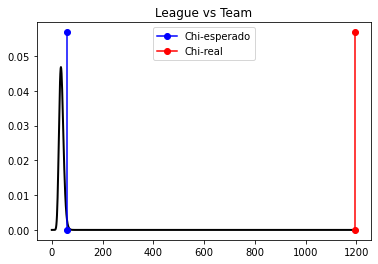

False

In [49]:
def checkIndependence(df,c1,c2,alpha):
    plt.clf()
    independence=False
    arr=pd.concat([df.iloc[:,c1],df.iloc[:,c2]],axis=1)
    contingency=getContingencyTable(arr).values
    q=(contingency.shape[0]-1)*(contingency.shape[1]-1)      
    chiSquare=computeChiSquare(arr)    
    z =stats.chi2.ppf(1-alpha, q)  
    print("Chi real: ",chiSquare) 
    print("Chi esperado: ",z)    
    x = np.linspace(0, max(z,chiSquare)+4, 1000)
    chiGrhap=plt.plot(x, stats.chi2.pdf(x, q), color='black', lw=2)
    
    # Z Value Line
    x1 = [z, z]
    y1 = [0, stats.chi2.pdf(x, q).max() + 0.01]
    plt.plot(x1, y1, marker = 'o', color='blue',label='Chi-esperado')
    
    # Chi Value Line
    x2 = [chiSquare, chiSquare]
    y2 = [0, stats.chi2.pdf(x, q).max() + 0.01]
    plt.plot(x2, y2, marker = 'o', color='red',label='Chi-real')
    plt.legend()
    plt.title(df.columns[c1]+" vs "+df.columns[c2])
    plt.show()    
    if chiSquare>=z:
        independence=False
    else:
        independence=True    
    return  independence
#irisset=pd.read_csv("iris.csv") #-Ejercicio del libro
#print(checkIndependence(irisset,0,1,0.01)
checkIndependence(baseball,1,0,0.01)

Ejercicio 2.3.5  

1.Podemos pasar la matriz baseball con algunas columnas de mas categorizadas  
usando  discretizeEqualLength o cualquier otra funcion de discretizacion y  
comprobar que ahora se efectua la prueba de independencia para mas pares de   atributos.

Ho=Los atributos son independientes
Se rechaza Ho si chi-observado>chi-esperado

H0= Team y League son linealmente independientes
Chi real:  1195.076923076923
Chi esperado:  61.1620867636897


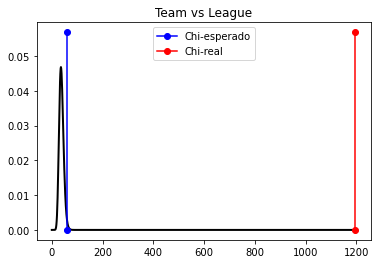

Las variables son dependientes.
------------------------------------


In [50]:
def chekforallpairs(df):
    print("Ho=Los atributos son independientes")
    print("Se rechaza Ho si chi-observado>chi-esperado")
    print()
    for i in combinations(df.columns,2):
        isCategoric1=pd.to_numeric(df[i[0]], errors='coerce').notnull().all()
        isCategoric2=pd.to_numeric(df[i[1]], errors='coerce').notnull().all()
        if not(isCategoric1) and not(isCategoric2):
            print("H0= "+i[0]+" y "+i[1]+" son linealmente independientes")
            indp=checkIndependence(df,df.columns.get_loc(i[0]),df.columns.get_loc(i[1]),0.01)
            if indp==False:
                print("Las variables son dependientes.")
                print("------------------------------------")
            else:
                print("Las variables son independientes.")
                print("------------------------------------")

#irisset=discretizeBasedOnThresholds(irisset,0,[5.2,6.1,7.0]) #-Ejercicio del libro        
#irisset=discretizeBasedOnThresholds(irisset,1,[2.8,3.6])
#baseball=discretizeEqualLength(pd.DataFrame.copy(baseball),5,10)###1
chekforallpairs(baseball)   

In [65]:
#Si las varaibles son independientes se simplifican varios calculos estadisticos
#por ejemplo las probabilidades Pij=Pi*pj, entonces podemos tratar cada variable
#con una funcion individual y no como una funcion multivariable, lo cual resulta 
#mas sencillo, tanto para calcular varianzas y matrices de covarianza.

Dimension of contingency table correct
Sum in contingency table correct
Number of expected values is correct
Chi square value is correct
Chi real:  1195.076923076923
Chi esperado:  53.383540622969356


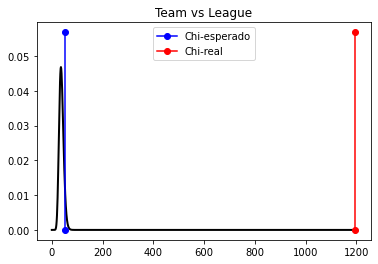

Dependency detected correctly


In [61]:
## Unit Test for contingency table etc.
ct = getContingencyTable(bbdf[bbdf.columns[:2]])
print("Dimension of contingency table " + ("correct" if ct.shape == (39,2) or ct.shape == (2,39) else "incorrect"))
print("Sum in contingency table " + ("correct" if np.sum(ct.values) == bbdf.shape[0] else "incorrect"))
eo = computeExpectedOcurrences(ct)
print("Number of expected values is " + ("correct" if np.sum(eo.values) == bbdf.shape[0] else "incorrect"))
chiSquare = computeChiSquare(bbdf[bbdf.columns[:2]])
print("Chi square value is " + ("correct" if np.isclose(np.round(chiSquare), 1195) else "incorrect"))
print("Dependency detected " + ("incorrectly" if checkIndependence(bbdf, 0, 1, 0.05) else "correctly"))

## Feedback
Nice job. Pero lo estás haciendo exactamente como lo hablamos y estás usando los grados de libertad.

2/2

Entiendo que falta tarea 1.

Total: 0 + 5.5 = 5.5/8